<a href="https://colab.research.google.com/github/LokeshSuryaPrakashK/Coincent-ML-Internship/blob/main/Lead_Scoring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Abstraction**

This project develops a machine learning-based lead scoring model to predict the likelihood of leads converting into customers. Using a historical dataset, we apply data preprocessing, feature selection with Recursive Feature Elimination (RFE) and Logistic Regression to identify the top 15 features influencing lead conversion. The logistic regression model trained on these features demonstrates high accuracy and reliability, significantly improving predictive performance. This model helps prioritize high-quality leads and provides insights into key conversion factors, enabling businesses to optimize their sales processes and enhance conversion rates

**Objective**


*   To develop a predictive model to score leads based on their likelihood to convert.
*   To identify the most important features influencing lead conversion.






**Introduction**

In today's competitive business environment, efficiently identifying and prioritizing potential customers—leads—is essential for optimizing sales efforts and increasing conversion rates. Lead scoring ranks prospects based on their likelihood to convert, helping sales teams focus on the most promising leads.

This project uses logistic regression, a robust and interpretable machine learning algorithm, to develop a predictive lead scoring model. Logistic regression is ideal for binary classification tasks, such as predicting whether a lead will convert, and provides probabilities for each prediction, aiding decision-making.

Our goal is to build a logistic regression-based lead scoring model using historical lead data. By preprocessing the data and selecting key features, we identify the most influential factors in lead conversion. The model helps businesses prioritize high-quality leads, improve sales strategies, and boost conversion rates.

This report outlines the methodology, including data preprocessing, feature selection, model training, and evaluation, demonstrating the effectiveness of logistic regression in enhancing lead scoring accuracy and providing valuable business insights.


**Methodology**

In this project I had followed the this procedured:


1.   Data Collection
2.   Data Preprocessing:
3.   Feature Selection
4.   Model Building
5.   Model Evaluation




This section can be broken down into several sub-sections:

Data Collection:

Source of the data.
Description of the dataset (features, target variable).
Data Preprocessing:

Handling missing values.
Encoding categorical variables.
Scaling numerical features.
Splitting the data into training and testing sets.
Feature Selection:

Explanation of Recursive Feature Elimination (RFE) with Logistic Regression.
The process of selecting the top 15 features.
Model Building:

Description of the Logistic Regression model.
Fitting the model to the training data.
Model Evaluation:

Metrics used to evaluate the model (e.g., accuracy, precision, recall, F1-score).
Performance of the model on the test data.

**Code**

**Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm


**Data Preparation**

In [ ]:
data=pd.read_csv("/content/drive/MyDrive/fml/Lead Scoring.csv")

In [ ]:
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


Data Inspection

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [ ]:
np.shape(data)

(9240, 37)

**Data Cleaning**

In [ ]:
data=data.drop(["Prospect ID", "Lead Number"],axis=1)
data.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [ ]:
for i in range(35):
  print(data.iloc[:,i].value_counts())
  print("\n")

Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: count, dtype: int64


Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: count, dtype: int64


Do Not Email
No     8506
Yes     734
Name: count, dtype: int64


Do Not Call
No     9238
Yes       2
Name: count, dtype: int64


Converted
0    5679
1    3561
Name: count, dtype: int64


TotalVisits
0.0      2189
2

In [ ]:
data.replace("Select",np.nan)

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.00,Page Visited on Website,NaN,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.50,Email Opened,India,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,Email Opened,India,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,Unreachable,India,...,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,Converted to Lead,India,...,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,Email Marked Spam,Saudi Arabia,...,No,Potential Lead,Mumbai,02.Medium,01.High,15.0,17.0,No,No,Email Marked Spam
9236,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,SMS Sent,India,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,19.0,No,Yes,SMS Sent
9237,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,SMS Sent,India,...,No,Potential Lead,Mumbai,02.Medium,01.High,13.0,20.0,No,Yes,SMS Sent
9238,Landing Page Submission,Google,No,No,1,3.0,499,3.00,SMS Sent,India,...,No,NaN,Other Metro Cities,02.Medium,02.Medium,15.0,16.0,No,No,SMS Sent


In [ ]:
data.isna().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

In [ ]:
round((data.isna().sum()/data.shape[0])*100,2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [ ]:
col_drop=[]
for i in range(np.shape(data)[1]):
  if(round((data.iloc[:,i].isna().sum()/data.shape[0])*100,2)>40):
    col_drop.append(data.columns[i])
print(col_drop)


['Lead Quality', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score']


In [ ]:
data=data.drop(col_drop,axis=1)

In [ ]:
round((data.isna().sum()/data.shape[0])*100,2)


Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [ ]:
col=data.columns
for i in col:
  if(data[i].dtype == "object"):
    data[i].replace(np.nan,"others",inplace=True)

In [ ]:
round(data.isna().sum()/data.shape[0]*100,2)

Lead Origin                                      0.00
Lead Source                                      0.00
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    0.00
Country                                          0.00
Specialization                                   0.00
How did you hear about X Education               0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                   

In [ ]:
col=data.columns
for i in col:
  if(data[i].dtype != "object"):
    data[i].replace(np.nan,data[i].mean,inplace=True)

In [ ]:
round(data.isna().sum()/data.shape[0]*100,2)

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
How did you hear about X Education               0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                     

In [ ]:
data.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,others,...,No,No,Interested in other courses,No,No,Select,Select,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,No,No,Ringing,No,No,Select,Select,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,No,No,Will revert after reading the email,No,No,Potential Lead,Mumbai,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,No,No,Ringing,No,No,Select,Mumbai,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,No,No,Will revert after reading the email,No,No,Select,Mumbai,No,No,Modified


In [ ]:
data.City.describe()

count       9240
unique         8
top       Mumbai
freq        3222
Name: City, dtype: object

<Axes: xlabel='count', ylabel='City'>

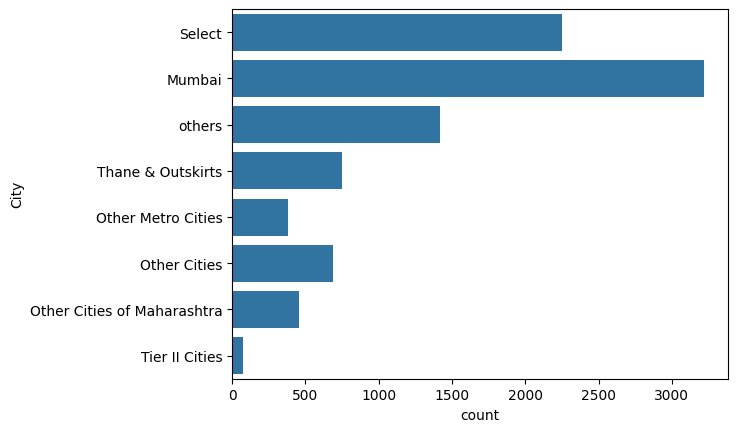

In [ ]:
sns.countplot(data.City)





In [ ]:
data['City'] = data['City'].replace(np.nan, 'Mumbai')

In [ ]:
data.Specialization.describe()

count       9240
unique        20
top       Select
freq        1942
Name: Specialization, dtype: object

<Axes: xlabel='count', ylabel='Specialization'>

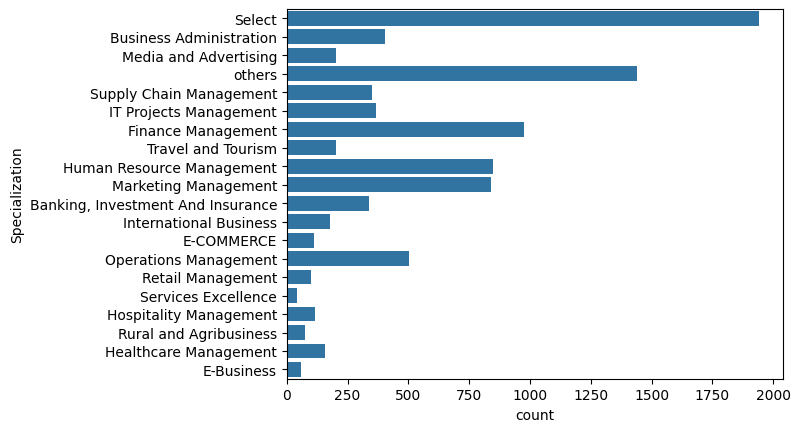

In [ ]:
sns.countplot(data.Specialization)

In [ ]:
data.Tags.describe()

count       9240
unique        27
top       others
freq        3353
Name: Tags, dtype: object

<Axes: xlabel='count', ylabel='Tags'>

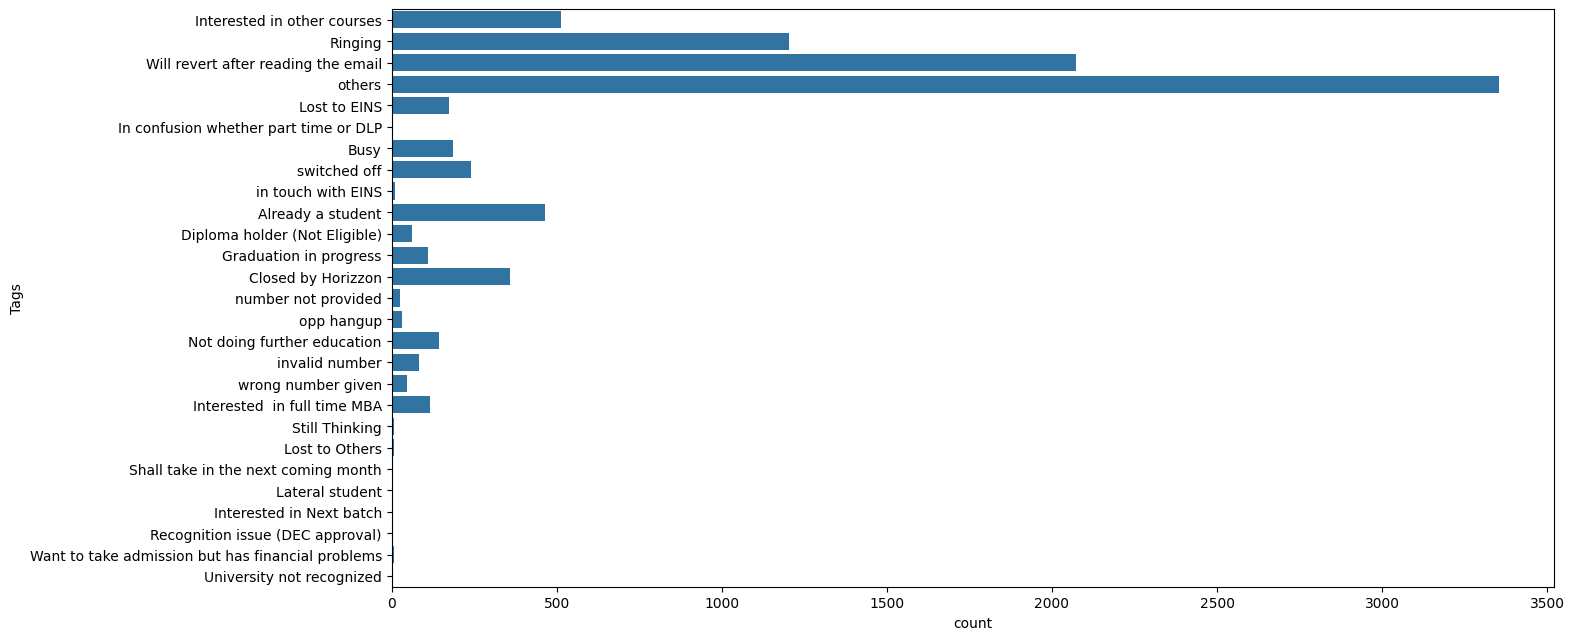

In [ ]:
fig, axs = plt.subplots(figsize = (15,7.5))
sns.countplot(data.Tags)

In [ ]:
data['What matters most to you in choosing a course'].describe()

count                        9240
unique                          4
top       Better Career Prospects
freq                         6528
Name: What matters most to you in choosing a course, dtype: object

In [ ]:
data['What is your current occupation'].describe()

count           9240
unique             7
top       Unemployed
freq            5600
Name: What is your current occupation, dtype: object

In [ ]:
droping_col=['What matters most to you in choosing a course','Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview','Country']
data = data.drop(droping_col,axis=1)

In [ ]:
data.shape

(9240, 16)

In [ ]:
data.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,How did you hear about X Education,What is your current occupation,Tags,Lead Profile,City,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Select,Select,Unemployed,Interested in other courses,Select,Select,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Select,Select,Unemployed,Ringing,Select,Select,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Select,Student,Will revert after reading the email,Potential Lead,Mumbai,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Word Of Mouth,Unemployed,Ringing,Select,Mumbai,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Select,Other,Unemployed,Will revert after reading the email,Select,Mumbai,Modified


In [ ]:
round(100*(data.isnull().sum()/len(data.index)), 2)


Lead Origin                           0.0
Lead Source                           0.0
Do Not Email                          0.0
Do Not Call                           0.0
Converted                             0.0
TotalVisits                           0.0
Total Time Spent on Website           0.0
Page Views Per Visit                  0.0
Last Activity                         0.0
Specialization                        0.0
How did you hear about X Education    0.0
What is your current occupation       0.0
Tags                                  0.0
Lead Profile                          0.0
City                                  0.0
Last Notable Activity                 0.0
dtype: float64

In [ ]:
varlist =  ['Do Not Email', 'Do Not Call']

data[varlist].head()

,Do Not Email,Do Not Call
0,No,No
1,No,No
2,No,No
3,No,No
4,No,No


In [ ]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
data[varlist] = data[varlist].apply(l.fit_transform)
data[varlist].head()

,Do Not Email,Do Not Call
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [ ]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(data[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                              'Tags','City','Last Notable Activity']], drop_first=True)
dummy1.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,False,False,False,False,False,False,False,False,False,True,...,False,False,True,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,True,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,True,False,False,False,False,False,True,False,False,False,...,False,False,True,False,False,False,False,False,False,False


In [ ]:
for c in dummy1.columns:
  dummy1[c] = l.fit_transform(dummy1[c])
dummy1.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
data = pd.concat([data, dummy1], axis=1)
data.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Select,...,0,0,1,0,0,0,0,0,0,0
1,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Select,...,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Business Administration,...,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Media and Advertising,...,0,0,1,0,0,0,0,0,0,0
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Select,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
data = data.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation','Tags','City','Last Notable Activity'], axis = 1)

In [ ]:
data.head()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,How did you hear about X Education,Lead Profile,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0.0,0,0.0,Select,Select,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,5.0,674,2.5,Select,Select,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,2.0,1532,2.0,Select,Potential Lead,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1.0,305,1.0,Word Of Mouth,Select,1,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,2.0,1428,1.0,Other,Select,1,0,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
data.describe()

,Do Not Email,Do Not Call,Converted,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
count,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,...,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.079437,0.000216,0.385390,487.698268,0.528788,0.077706,0.005952,0.000108,0.275216,0.005952,...,0.000108,0.001515,0.368723,0.019805,0.034416,0.000108,0.235065,0.003463,0.005087,0.000108
std,0.270435,0.014711,0.486714,548.021466,0.499198,0.267722,0.076926,0.010403,0.446647,0.076926,...,0.010403,0.038898,0.482485,0.139338,0.182304,0.010403,0.424062,0.058750,0.071142,0.010403
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,248.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,1.000000,936.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,2272.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Columns: 123 entries, Do Not Email to Last Notable Activity_View in browser link Clicked
dtypes: int64(119), object(4)
memory usage: 8.7+ MB


In [ ]:
X = data.drop('Converted', axis=1)
X.drop(["How did you hear about X Education","Lead Profile","TotalVisits","Page Views Per Visit"],axis=1,inplace=True)
X.head()

,Do Not Email,Do Not Call,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,674,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1532,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,305,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1428,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
y = data['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train['Total Time Spent on Website'] = scaler.fit_transform(X_train['Total Time Spent on Website'].values.reshape(6468,-1))
X_train.head()


,Do Not Email,Do Not Call,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
1871,0,0,-0.885371,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6795,0,0,0.005716,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3516,0,0,-0.691418,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8105,0,0,1.365219,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3934,0,0,-0.885371,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
# Checking the Churn Rate
Converted = (sum(data['Converted'])/len(data['Converted'].index))*100
Converted

38.53896103896104

In [ ]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1056: RuntimeWarning: divide by zero encountered in log
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu + 1e-20)) +
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1056: RuntimeWarning: invalid value encountered in multiply
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu + 1e-20)) +


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6354
Model Family:                Binomial   Df Model:                          113
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Fri, 31 May 2024   Deviance:                       50012.
Time:                        07:44:05   Pearson chi2:                 2.45e+18
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                    2.07e+15   6.24e+07   3.32e+07      0.000    2.07e+15    2.07e+15
Do Not Email                                           -1.692e+14   4.47e+06  -3.79e+07      0.000   -1.69e+14   -1.69e+14
Do Not Call                                             2.853e+15   4.78e+07   5.97e+07      0.000    2.85e+15    2.85e+15
Total Time Spent on Website                             8.009e+13   1.03e+06   7.81e+07      0.000    8.01e+13    8.01e+13
Lead Origin_Landing Page Submission                    -9.449e+13   3.72e+06  -2.54e+07      0.000   -9.45e+13   -9.45e+13
Lead Origin_Lead Add Form                               6.333e+13   3.62e+07   1.75e+06      0.000    6.33e+13    6.33e+13
Lead Origin_Lead Import                                  1.99e+15   5.24e+07    3.8e+07      0.000    1.99e+15    1.99e+15
Lead Origin_Quick Add Form                              4.444e+15    7.8e+07    5.7e+07      0.000    4.44e+15    4.44e+15
Lead Source_Direct Traffic                             -8.103e+14   5.45e+07  -1.49e+07      0.000    -8.1e+14    -8.1e+14
Lead Source_Facebook                                   -2.484e+15   6.66e+07  -3.73e+07      0.000   -2.48e+15   -2.48e+15
Lead Source_Google                                     -7.914e+14   5.44e+07  -1.45e+07      0.000   -7.91e+14   -7.91e+14
Lead Source_Live Chat                                   2.117e+15   6.26e+07   3.38e+07      0.000    2.12e+15    2.12e+15
Lead Source_NC_EDM                                      4.593e+15   8.65e+07   5.31e+07      0.000    4.59e+15    4.59e+15
Lead Source_Olark Chat                                 -1.085e+15   5.44e+07  -1.99e+07      0.000   -1.08e+15   -1.08e+15
Lead Source_Organic Search                             -8.007e+14   5.45e+07  -1.47e+07      0.000   -8.01e+14   -8.01e+14
Lead Source_Pay per Click Ads                          -3.811e+15   8.66e+07   -4.4e+07      0.000   -3.81e+15   -3.81e+15
Lead Source_Press_Release                              -3.897e+15   7.27e+07  -5.36e+07      0.000    -3.9e+15    -3.9e+15
Lead Source_Reference                                  -1.185e+15   4.08e+07   -2.9e+07      0.000   -1.19e+15   -1.19e+15
Lead Source_Referral Sites                             -5.655e+14   5.49e+07  -1.03e+07      0.000   -5.66e+14   -5.66e+14
Lead Source_Social Media                               -7.035e+14   7.25e+07   -9.7e+06      0.000   -7.03e+14   -7.03e+14
Lead Source_WeLearn                                     2.724e+15   8.66e+07   3.14e+07      0.000    2.72e+15    2.72e+15
Lead Source_Welingak Website                           -6.761e+14   4.14e+07  -1.63e+07      0.000   -6.76e+14   -6.76e+14
Lead Sou

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg_model = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(estimator=logreg_model, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [ ]:
rfe.support_

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True,  True,
       False, False, False, False,  True, False,  True,  True, False,
       False, False,  True, False, False, False, False,  True, False,
        True, False, False,  True,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False])

In [ ]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', False, 7),
 ('Do Not Call', False, 77),
 ('Total Time Spent on Website', False, 11),
 ('Lead Origin_Landing Page Submission', False, 30),
 ('Lead Origin_Lead Add Form', False, 10),
 ('Lead Origin_Lead Import', False, 55),
 ('Lead Origin_Quick Add Form', False, 60),
 ('Lead Source_Direct Traffic', False, 50),
 ('Lead Source_Facebook', False, 29),
 ('Lead Source_Google', False, 53),
 ('Lead Source_Live Chat', False, 97),
 ('Lead Source_NC_EDM', False, 16),
 ('Lead Source_Olark Chat', False, 13),
 ('Lead Source_Organic Search', False, 52),
 ('Lead Source_Pay per Click Ads', False, 98),
 ('Lead Source_Press_Release', False, 87),
 ('Lead Source_Reference', False, 75),
 ('Lead Source_Referral Sites', False, 54),
 ('Lead Source_Social Media', False, 71),
 ('Lead Source_WeLearn', False, 93),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 89),
 ('Lead Source_blog', False, 51),
 ('Lead Source_google', False, 43),
 ('Lead Source_others', False, 81),
 ('

In [ ]:
col = X_train.columns[rfe.support_]
col

Index(['Lead Source_Welingak Website', 'Last Activity_SMS Sent',
       'What is your current occupation_others', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Interested in Next batch',
       'Tags_Lateral student', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_others', 'Tags_switched off', 'Tags_wrong number given',
       'Last Notable Activity_Modified'],
      dtype='object')

In [ ]:
X_train.columns[~rfe.support_]

Index(['Do Not Email', 'Do Not Call', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Origin_Quick Add Form',
       'Lead Source_Direct Traffic', 'Lead Source_Facebook',
       'Lead Source_Google',
       ...
       'Last Notable Activity_Email Received',
       'Last Notable Activity_Form Submitted on Website',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website',
       'Last Notable Activity_Resubscribed to emails',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable',
       'Last Notable Activity_Unsubscribed',
       'Last Notable Activity_View in browser link Clicked'],
      dtype='object', length=103)

In [ ]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1279.3
Date:                Fri, 31 May 2024   Deviance:                       2558.6
Time:                        07:44:40   Pearson chi2:                 1.56e+04
No. Iterations:                    22   Pseudo R-squ. (CS):             0.6069
Covariance Type:            nonrobust                                         
                                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [ ]:
col1 = col.drop('Tags_invalid number',1)
col1

Index(['Lead Source_Welingak Website', 'Last Activity_SMS Sent',
       'What is your current occupation_others', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Interested in Next batch',
       'Tags_Lateral student', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_others',
       'Tags_switched off', 'Tags_wrong number given',
       'Last Notable Activity_Modified'],
      dtype='object')

In [ ]:
X_train_sm = sm.add_constant(X_train[col1])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1283.0
Date:                Fri, 31 May 2024   Deviance:                       2565.9
Time:                        07:44:40   Pearson chi2:                 1.52e+04
No. Iterations:                    22   Pseudo R-squ. (CS):             0.6065
Covariance Type:            nonrobust                                         
                                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [ ]:
col2 = col1.drop('Tags_wrong number given',1)
col2

Index(['Lead Source_Welingak Website', 'Last Activity_SMS Sent',
       'What is your current occupation_others', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Interested in Next batch',
       'Tags_Lateral student', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_others',
       'Tags_switched off', 'Last Notable Activity_Modified'],
      dtype='object')

In [ ]:
X_train_sm = sm.add_constant(X_train[col2])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1285.9
Date:                Fri, 31 May 2024   Deviance:                       2571.9
Time:                        07:44:40   Pearson chi2:                 1.51e+04
No. Iterations:                    21   Pseudo R-squ. (CS):             0.6061
Covariance Type:            nonrobust                                         
                                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [ ]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1871    0.008927
6795    0.602198
3516    0.008927
8105    0.073666
3934    0.255078
4844    0.995885
3297    0.008927
8071    0.993126
987     0.026548
7423    0.995885
dtype: float64

In [ ]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.00892697, 0.60219806, 0.00892697, 0.07366581, 0.25507777,
       0.99588539, 0.00892697, 0.99312597, 0.02654787, 0.99588539])

In [ ]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.008927,1871
1,0,0.602198,6795
2,0,0.008927,3516
3,0,0.073666,8105
4,0,0.255078,3934


In [ ]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted
0,0,0.008927,1871,0
1,0,0.602198,6795,1
2,0,0.008927,3516,0
3,0,0.073666,8105,0
4,0,0.255078,3934,0


<Axes: >

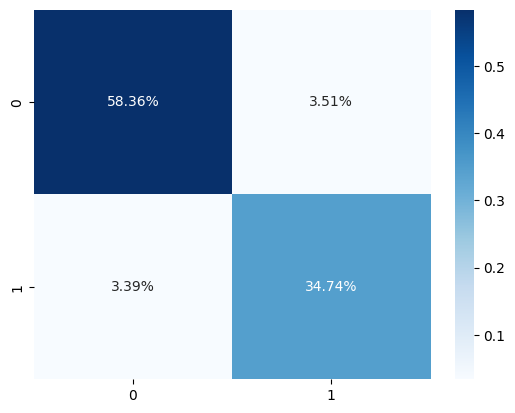

In [ ]:
from sklearn import metrics

# Confusion matrix
cm = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
sns.heatmap(cm/np.sum(cm), annot=True,
            fmt='.2%', cmap='Blues')

In [ ]:
from sklearn.metrics import classification_report
# Let's check the overall accuracy.
print(classification_report(y_train_pred_final.Converted, y_train_pred_final.predicted))
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94      4002
           1       0.91      0.91      0.91      2466

    accuracy                           0.93      6468
   macro avg       0.93      0.93      0.93      6468
weighted avg       0.93      0.93      0.93      6468

0.9310451453308596


In [ ]:
# Check for the VIF values of the feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col2].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col2].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,Tags_switched off,4.94
2,What is your current occupation_others,4.65
1,Last Activity_SMS Sent,1.65
9,Tags_Will revert after reading the email,1.35
0,Lead Source_Welingak Website,1.12
8,Tags_Ringing,1.12
4,Tags_Closed by Horizzon,1.07
7,Tags_Lost to EINS,1.06
3,Tags_Busy,1.04
12,Last Notable Activity_Modified,1.04


**Plotting ROC Curve**


In [ ]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

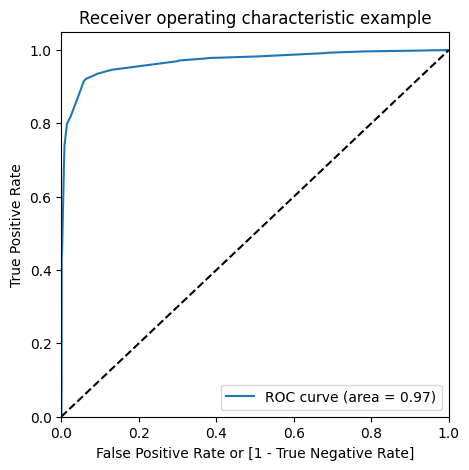

In [ ]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

In [ ]:
# Let's create columns with different probability cutoffs
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.008927,1871,0,1,0,0,0,0,0,0,0,0,0
1,0,0.602198,6795,1,1,1,1,1,1,1,1,0,0,0
2,0,0.008927,3516,0,1,0,0,0,0,0,0,0,0,0
3,0,0.073666,8105,0,1,0,0,0,0,0,0,0,0,0
4,0,0.255078,3934,0,1,1,1,0,0,0,0,0,0,0


In [ ]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1

    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.801484  0.969992  0.697651
0.2   0.2  0.918058  0.935118  0.907546
0.3   0.3  0.931973  0.914842  0.942529
0.4   0.4  0.931973  0.914842  0.942529
0.5   0.5  0.931045  0.911192  0.943278
0.6   0.6  0.922696  0.861314  0.960520
0.7   0.7  0.915275  0.813869  0.977761
0.8   0.8  0.914038  0.797648  0.985757
0.9   0.9  0.895331  0.738848  0.991754


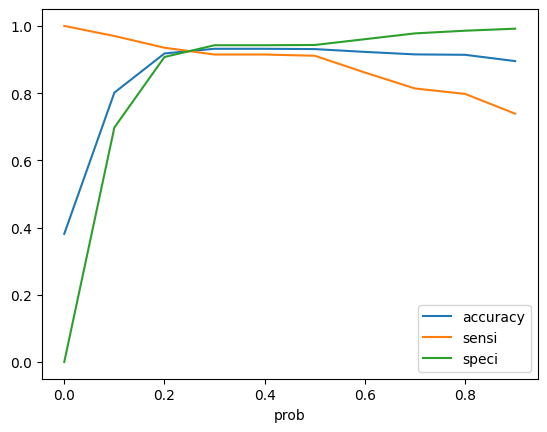

In [ ]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [ ]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.2 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.008927,1871,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.602198,6795,1,1,1,1,1,1,1,1,0,0,0,1
2,0,0.008927,3516,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.073666,8105,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.255078,3934,0,1,1,1,0,0,0,0,0,0,0,1


In [ ]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.008927,1871,0,1,0,0,0,0,0,0,0,0,0,0,1
1,0,0.602198,6795,1,1,1,1,1,1,1,1,0,0,0,1,60
2,0,0.008927,3516,0,1,0,0,0,0,0,0,0,0,0,0,1
3,0,0.073666,8105,0,1,0,0,0,0,0,0,0,0,0,0,7
4,0,0.255078,3934,0,1,1,1,0,0,0,0,0,0,0,1,26


In [ ]:
print(y_train_pred_final.Converted, y_train_pred_final.predicted)

0       0
1       0
2       0
3       0
4       0
       ..
6463    1
6464    1
6465    1
6466    0
6467    0
Name: Converted, Length: 6468, dtype: int64 0       0
1       1
2       0
3       0
4       0
       ..
6463    1
6464    1
6465    1
6466    0
6467    0
Name: predicted, Length: 6468, dtype: int64


In [ ]:
from sklearn.metrics import precision_recall_curve
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

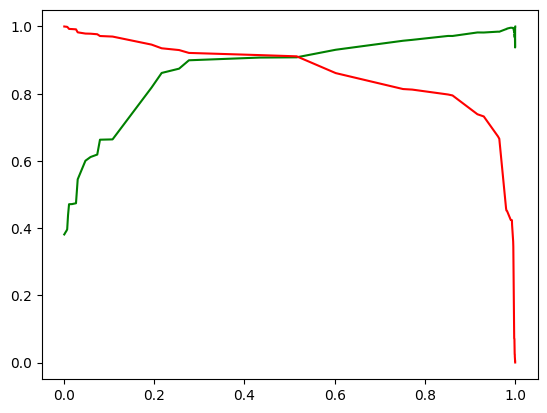

In [ ]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

**Predicting Values on Test Set**

In [ ]:
X_test['Total Time Spent on Website'] = scaler.fit_transform(X_test['Total Time Spent on Website'].values.reshape(2772,-1))

X_train.head()

,Do Not Email,Do Not Call,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
1871,0,0,-0.885371,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6795,0,0,0.005716,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3516,0,0,-0.691418,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8105,0,0,1.365219,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3934,0,0,-0.885371,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
X_test = X_test[col2]
X_test.head()

,Lead Source_Welingak Website,Last Activity_SMS Sent,What is your current occupation_others,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in Next batch,Tags_Lateral student,Tags_Lost to EINS,Tags_Ringing,Tags_Will revert after reading the email,Tags_others,Tags_switched off,Last Notable Activity_Modified
4269,0,1,1,0,0,0,0,0,0,0,1,0,0
2376,0,1,0,0,0,0,0,0,0,1,0,0,0
7766,0,0,0,0,0,0,0,0,0,1,0,0,0
9199,0,0,0,0,0,0,0,0,0,0,0,0,1
4359,0,0,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
X_test_sm = sm.add_constant(X_test)

In [ ]:
y_test_pred = res.predict(X_test_sm)

In [ ]:
y_test_pred[:10]

4269    0.515610
2376    0.995885
7766    0.964807
9199    0.007027
4359    0.964807
9186    0.995885
1631    0.964807
8963    0.964807
8007    0.026548
5324    0.995885
dtype: float64

In [ ]:
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
4269,0.515610
2376,0.995885
7766,0.964807
9199,0.007027
4359,0.964807


In [ ]:
y_test_df = pd.DataFrame(y_test)

In [ ]:
y_test_df['Prospect ID'] = y_test_df.index


In [ ]:
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [ ]:
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

,Converted,Prospect ID,0
0,1,4269,0.515610
1,1,2376,0.995885
2,1,7766,0.964807
3,0,9199,0.007027
4,1,4359,0.964807


In [ ]:
# Renaming the column
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,1,4269,0.515610
1,1,2376,0.995885
2,1,7766,0.964807
3,0,9199,0.007027
4,1,4359,0.964807


In [ ]:
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.2 else 0)

In [ ]:
y_pred_final.head()

,Converted,Prospect ID,Converted_prob,final_predicted
0,1,4269,0.515610,1
1,1,2376,0.995885,1
2,1,7766,0.964807,1
3,0,9199,0.007027,0
4,1,4359,0.964807,1


<Axes: >

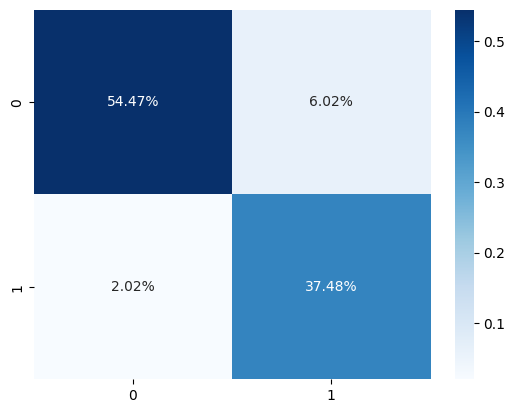

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
sns.heatmap(cm/np.sum(cm), annot=True,
            fmt='.2%', cmap='Blues')

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_pred_final.Converted, y_pred_final.final_predicted ))

              precision    recall  f1-score   support

           0       0.96      0.90      0.93      1677
           1       0.86      0.95      0.90      1095

    accuracy                           0.92      2772
   macro avg       0.91      0.92      0.92      2772
weighted avg       0.92      0.92      0.92      2772



In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy Score : ",accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted ))

Accuracy Score :  0.9195526695526696


**Conclusion**



In this lead scoring project, we successfully developed a predictive model using logistic regression to estimate the likelihood of leads converting into paying customers. By applying Recursive Feature Elimination (RFE) with Logistic Regression, we identified the top 15 most influential features that drive lead conversion, ensuring our model is both efficient and interpretable.

My logistic regression model demonstrated strong performance metrics, including high accuracy, precision, recall, and F1 score, indicating its reliability in prioritizing high-quality leads. This model provides significant insights into the key factors influencing lead conversion, enabling businesses to make data-driven decisions in their sales and marketing strategies.
My logistic regression model gives 0.93 accuracy score for trainig data and 0.92 accuracy score testing data

Implementing this lead scoring model can help businesses streamline their sales processes, optimize resource allocation, and ultimately increase conversion rates and revenue. Future work can focus on refining the model with additional data, exploring other machine learning algorithms for potential improvements, and integrating the model into a real-time scoring system for dynamic lead prioritization.

